# Read and Visualize  CloudSat GEOPROF



"The 2B GEOPROF R04 product identifies those levels in the vertical column sampled by CloudSat that contain significant radar echo from hydrometeors (rather than noise or radar clutter) and provides an estimate of the radar reflectivity factor for each of these volumes. Also included in the GEOPROF product is an estimate of the expected gaseous absorption loss for the observed reflectivity (which depends on water vapor fields from ECMWF), the MODIS cloud fraction (from MOD35) associated with the radar surface foot print, and several other flags the indicates the homogeneity of the MODIS data, and quality of the CloudSat data. Details on the GEOPROF algorithms and structure of the HDF-EOS output files can be found in Marchand et al. (2008) and the Level 2 GEOPROF Product Process Description and Interface Control Document" (https://www.cloudsat.cira.colostate.edu/data-products/2b-geoprof)



For more info:
https://www.cloudsat.cira.colostate.edu/data-products/2b-geoprof

------------------------
DTR


# Import Packages

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
from pyhdf.SD  import SD, SDC
from pyhdf.V import *
from pyhdf.HDF import *

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [7]:
import scienceplots

In [8]:
import os

# Directory Management

In [9]:
#os.getcwd()

# Data Directory

In [10]:
dir_data = "/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Cloudsat_2BGEOPROF_IDAI/Co5O29_0001_0013/"

In [11]:
os.listdir(dir_data)

['2019074110211_68599_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019078101706_68657_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019068103118_68511_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019065101550_68467_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019070100846_68540_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019066105350_68482_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019076103938_68628_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019063103822_68438_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019079105506_68672_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019073102411_68584_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019064111622_68453_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019077111738_68643_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019069110918_68526_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf']

In [12]:
lst_Files = [fl for fl in os.listdir(dir_data) if fl.endswith('.hdf') ]
lst_Files

['2019074110211_68599_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019078101706_68657_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019068103118_68511_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019065101550_68467_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019070100846_68540_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019066105350_68482_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019076103938_68628_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019063103822_68438_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019079105506_68672_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019073102411_68584_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019064111622_68453_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019077111738_68643_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf',
 '2019069110918_68526_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf']

In [13]:
lst_Files[0]

'2019074110211_68599_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf'

# Single File to Read

In [14]:
fle_read = os.path.join( dir_data, lst_Files[2])
fle_read

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Cloudsat_2BGEOPROF_IDAI/Co5O29_0001_0013/2019068103118_68511_CS_2B-GEOPROF_GRANULE_P1_R05_E08_F03.hdf'

# Read File - GEOLOCATION FIELDS

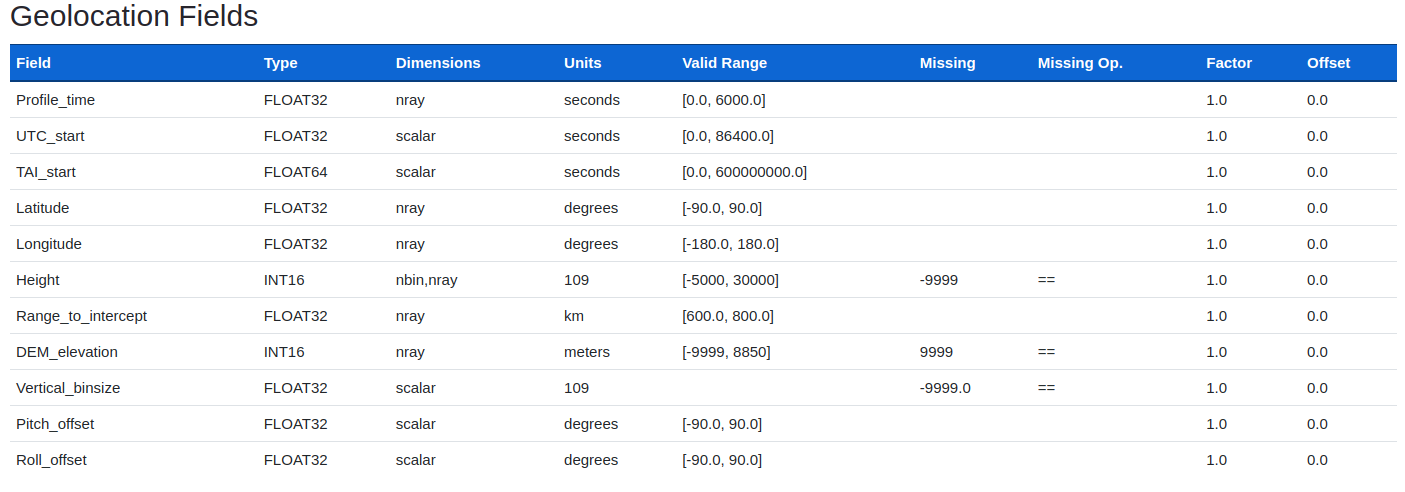

In [15]:
dat_vdata = HDF(fle_read, HC.READ).vstart()
dat_vdata

In [16]:
vdata = dat_vdata.vdatainfo()

In [17]:
vdata  # you can see that this data structure corresponds to the structure depicted in the figure above

[('Profile_time', '', 7, 36950, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 36950, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 36950, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 36950, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 36950, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 36950, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 36950, 1, 0, 2, 1962, 0),
 ('Data_targetID', '', 20, 36950, 1, 0, 1, 1962, 0),
 ('RayStatus_validity', '', 21, 36950, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 22, 36950, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 23, 36950, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 30, 36950, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 31, 36950, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 32, 36950, 1, 0, 1, 1962, 0),
 ('MO

Dimension 10 refers to 'Latitude'

In [18]:
# test how to read a row in vdata
dat_vdata.attach(10).inquire() #[0]

(36950, 0, ['Latitude'], 4, 'Latitude')

In [19]:
dat_vdata.attach(14).inquire() 

(36950, 0, ['DEM_elevation'], 2, 'DEM_elevation')

In [20]:
# how to read the number of records and the name of geolocation variable
dat_vdata.attach(14).inquire()[0], dat_vdata.attach(14).inquire()[-1]

(36950, 'DEM_elevation')

...

In [21]:
# we can read a number of geolocation variables of interest using a loop and store 
# the results in a list.

# from the Geolocation file, let's read the following dims
dims2read = [ 8 , 10, 11, 18 ,32, 39]

# 8 = UTC_start
# 10 = Latitide
# 11 = Longitude
# 18 = Data_quality
# 32 = MODIS_Cloud_Fraction
# 39 = Navigation_land_sea_flag

In [22]:
num_recs = []
geoloc_names = []

for ref in dims2read:
    vd = dat_vdata.attach(ref)
    num_recs.append(vd.inquire()[0])  ## number of records of the Vdata
    geoloc_names.append(vd.inquire()[-1]) ## name of the Vdata
    vd.detach()

print('------------------------------------------------------------------')
print('\033[94m'+'\033[1m'+  "Geolocation variables read" + '\033[0m')
print(geoloc_names)##輸出的變數名稱  ##Output variable name
print('------------------------------------------------------------------')
print('\033[35m'+'\033[1m'+  "Number of records per Geolocation variable read" + '\033[0m')
print(num_recs)##變數矩陣的長度 ##The length of the variable matrix

------------------------------------------------------------------
Geolocation variables read
['UTC_start', 'Latitude', 'Longitude', 'Data_quality', 'MODIS_Cloud_Fraction', 'Navigation_land_sea_flag']
------------------------------------------------------------------
Number of records per Geolocation variable read
[1, 36950, 36950, 36950, 36950, 36950]


##  Read the geolocation data

In [23]:
# Read geolocation variables
idx = geoloc_names.index('UTC_start')
var = dat_vdata.attach(dims2read[idx])
UTC_time = var.read(num_recs[idx])

idx = geoloc_names.index('Latitude')
var = dat_vdata.attach(dims2read[idx])
latitude = var.read(num_recs[idx])

idx = geoloc_names.index('Longitude',)
var = dat_vdata.attach(dims2read[idx])
longitude = var.read(num_recs[idx])

idx = geoloc_names.index('MODIS_Cloud_Fraction',)
var = dat_vdata.attach(dims2read[idx])
MODIS_cloud_fraction = var.read(num_recs[idx])

idx = geoloc_names.index('Data_quality',)
var = dat_vdata.attach(dims2read[idx])
data_quality = var.read(num_recs[idx])

del dat_vdata

In [24]:
len(longitude),  len(latitude), 

(36950, 36950)

In [25]:
longitude[:5]

[[-130.75128173828125],
 [-130.7533416748047],
 [-130.75538635253906],
 [-130.7574462890625],
 [-130.75949096679688]]

In [26]:
latitude[:5]

[[-0.001979412976652384],
 [-0.011681333184242249],
 [-0.0213832538574934],
 [-0.031085172668099403],
 [-0.040787093341350555]]

# Read the real data - HDF Scientific Data Set (SDS)

we will now read in the 'real data' i.e. the Scientifc Dataset(s)

pyhdf provides the SD method to read the scientific dataset(s)

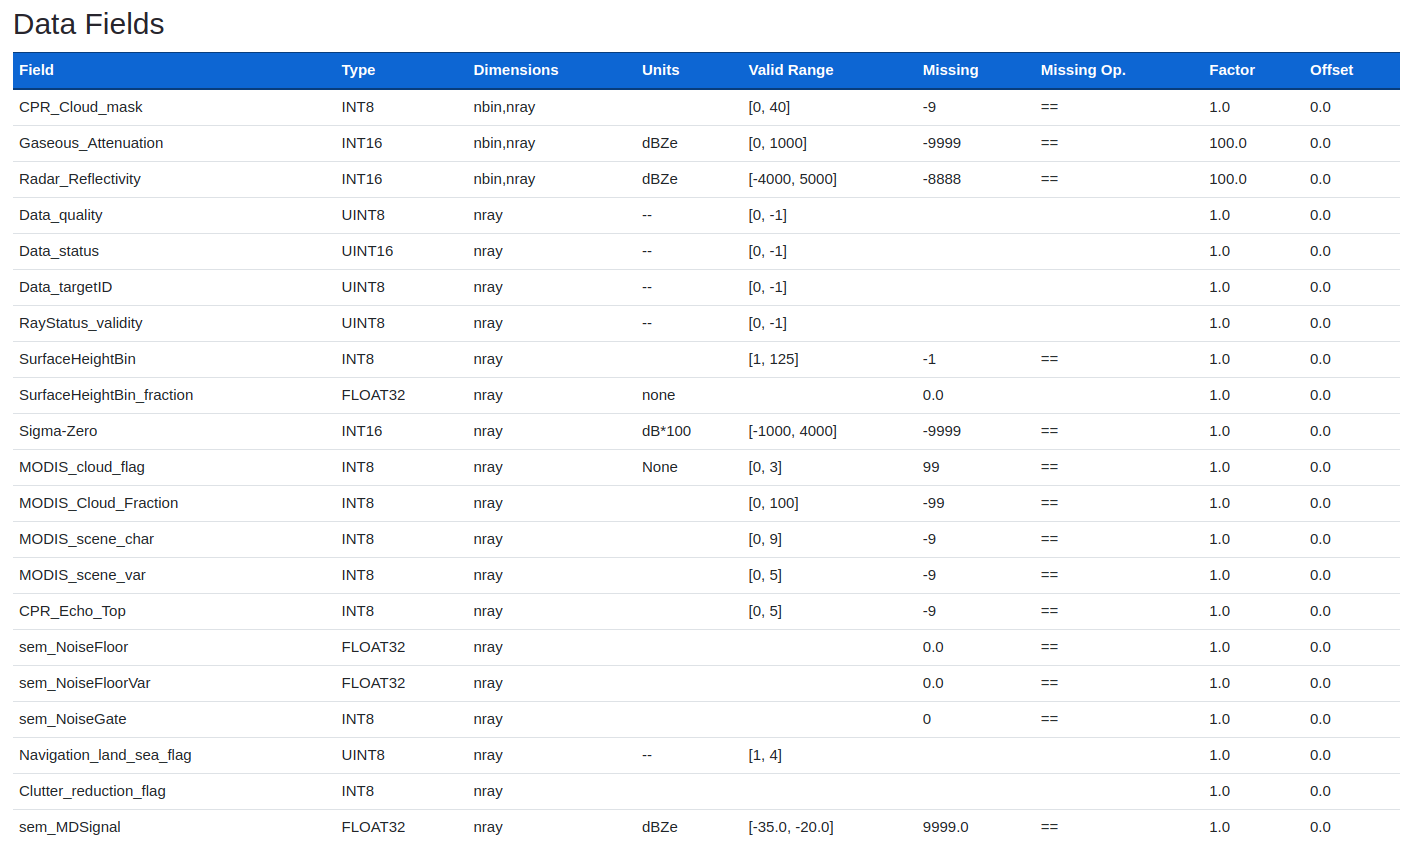

Here we go!!

In [27]:
hdfFile = SD(fle_read, SDC.READ)

In [28]:
dsets = hdfFile.datasets()

In [29]:
dsets

{'Height': (('nray:2B-GEOPROF', 'nbin:2B-GEOPROF'), (36950, 125), 22, 0),
 'CPR_Cloud_mask': (('nray:2B-GEOPROF', 'nbin:2B-GEOPROF'),
  (36950, 125),
  20,
  1),
 'Gaseous_Attenuation': (('nray:2B-GEOPROF', 'nbin:2B-GEOPROF'),
  (36950, 125),
  22,
  2),
 'Radar_Reflectivity': (('nray:2B-GEOPROF', 'nbin:2B-GEOPROF'),
  (36950, 125),
  22,
  3)}

In [30]:

k = []
for key in dsets.keys():
    k.append(key)
k.sort()

hdfFile.end() # close the file


print('------------------------------------------------------------------')
print('\033[94m'+'\033[1m'+  "SDS read" + '\033[0m')
print(k)

------------------------------------------------------------------
SDS read
['CPR_Cloud_mask', 'Gaseous_Attenuation', 'Height', 'Radar_Reflectivity']


## Read the data

In [31]:
hdfFile = SD(fle_read, SDC.READ) ## read the file
#####################################################
## get radar reflectivity
Reflectivity = hdfFile.select('Radar_Reflectivity') 
# get the CPR cloud mask
Cloud_mask = hdfFile.select('CPR_Cloud_mask')
# get the height array
Height = hdfFile.select('Height')
## gas attenuation
Gas_attenu = hdfFile.select('Gaseous_Attenuation')

We can check the attributes of the data that was read in

In [32]:
Reflectivity.attributes()

{'_FillValue': -8192}

In [33]:
Reflectivity

In [34]:
np.asarray(Reflectivity[:,:])

array([[-8888, -8888, -8888, ..., -8888, -8888, -8888],
       [-8888, -8888, -8888, ..., -8888, -8888, -8888],
       [-8888, -8888, -8888, ..., -8888, -8888, -8888],
       ...,
       [-8888, -8888, -8888, ..., -8888, -8888, -8888],
       [-8888, -8888, -8888, ..., -8888, -8888, -8888],
       [-8888, -8888, -8888, ..., -8888, -8888, -8888]], dtype=int16)

.. check cloud mask data

In [35]:
Cloud_mask.getfillvalue()

-9

In [36]:
Cloud_mask.attributes()

{'_FillValue': -9}

In [37]:
Cloud_mask.info()

('CPR_Cloud_mask', 2, [36950, 125], 20, 1)

In [38]:
Gas_attenu.info()

('Gaseous_Attenuation', 2, [36950, 125], 22, 1)

# Plotting

## Global Cloudsat Trajectory

Cloudsat has a global flight trajectory. Let's visualize that trajectory...

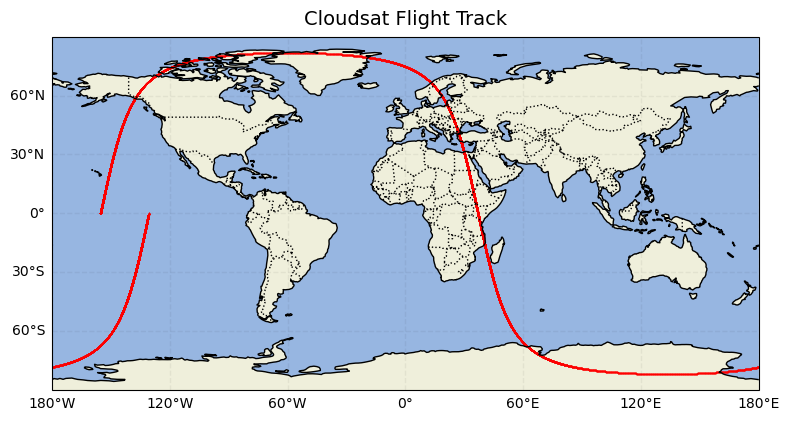

In [39]:
fig = plt.figure(figsize=(8,7))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,linestyle=":" )
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
### add flight path
#plt.scatter(longitude, latitude, c=data, s=1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
plt.scatter(longitude, latitude, c='red' , s=1, edgecolors=None, linewidth=0)
########### label axis
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", 
                  alpha=0.05, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
### add title
plt.title('Cloudsat Flight Track', fontsize=14, y=1.01)
###
plt.tight_layout()
plt.show()

## Subset for a Region of Interest (ROI)

..often we are interested in a smaller region, hence we have to subset the global files.

In [40]:
# Define a region of interest: Cyclone Idai
min_lon = 30.0
max_lon = 51.5
##
max_lat = -5.0
min_lat = -25.5

..subset

In [41]:
ROI_long =np.asarray(longitude)  # Longitude - ROI 
ROI_lati =np.asarray(latitude)   # Latitude
shape1 = ROI_long.shape
lonlat_mask= np.zeros((shape1[0],1),dtype=int) # background = zero; allows us to create a binary array

for i in range(0,shape1[0]):
    if ROI_long[i] > min_lon and ROI_long[i]< max_lon and ROI_lati[i] > min_lat and ROI_lati[i] < max_lat:
        lonlat_mask[i]= 1 # 1 = within region of interest. Turns the zero into 1
        
ROI_array_size=sum(lonlat_mask)

In [42]:
shape1

(36950, 1)

In [43]:
lonlat_mask.shape, ROI_lati.shape

((36950, 1), (36950, 1))

In [44]:
# array size over the Region of Interest
ROI_array_size[0]

2117

## Get data that is within the ROI from the complete variable matrix

In [45]:
##Extract the matrix that is within the ROI from the complete variable matrix

ROI_Reflectivity= np.zeros((ROI_array_size[0],125))
ROI_Cloud_mask= np.zeros((ROI_array_size[0],125))
ROI_Gas_attenu= np.zeros((ROI_array_size[0],125))
ROI_height= np.zeros((ROI_array_size[0],125))

ROI_lat= np.zeros((ROI_array_size[0],1))
ROI_lon= np.zeros((ROI_array_size[0],1))

k=0 # track idx
for i in range(0,shape1[0]):
    if lonlat_mask[i]>0:
        ROI_Reflectivity[k,:]= Reflectivity[i,:]/100  # application of scaling factor 100
        ROI_Cloud_mask[k,:]= Cloud_mask[i,:]  # cloud mask factor == 1
        ROI_Gas_attenu[k,:] = Gas_attenu[i,:]/100 # application of scaling factor 100
        ROI_height[k,:]=Height[i,:]
        ROI_lat[k,0]=ROI_lati[i][0]
        ROI_lon[k,0]=ROI_long[i][0]
        k=k+1

In [46]:
ROI_lat.shape, ROI_lati.shape

((2117, 1), (36950, 1))

In [47]:
type(ROI_Reflectivity)

numpy.ndarray

## Array Manipulation for plotting

Basically, first transpose the matrix and then invert the columns in order to draw a picture

In [48]:
ROI_Reflectivity.shape

(2117, 125)

In [49]:
##First transpose the matrix and then invert the columns in order to draw a picture
Ref= ROI_Reflectivity[:,:].T
rev_Ref = Ref[::-1]

In [50]:
# missing data is -8888 for radar reflectivivity
#rev_Ref = np.where(rev_Ref == -8888/100, np.nan, rev_Ref) # /100 because I had already scaled the data

In [51]:
rev_Ref.shape

(125, 2117)

In [52]:
##First transpose the matrix and then invert the columns in order to draw a picture
c_mask= ROI_Cloud_mask[:,:].T
rev_c_mask = c_mask[::-1]

In [53]:
# Gass attenuation
ROI_Gas_attenu.shape

(2117, 125)

In [54]:
Gas_att = ROI_Gas_attenu[:,:].T
rev_Gas = Gas_att[::-1]

In [55]:
Hef= ROI_height[:,:].T
rev_Hef = Hef[::-1]
#stats
ref_height=np.mean(rev_Hef,axis=1)
ref_height=np.around(ref_height)

In [56]:
# round the latitide values for plotting
ROI_lat = np.around(ROI_lat,decimals=1)

### Plot Cloudsat Track over ROI

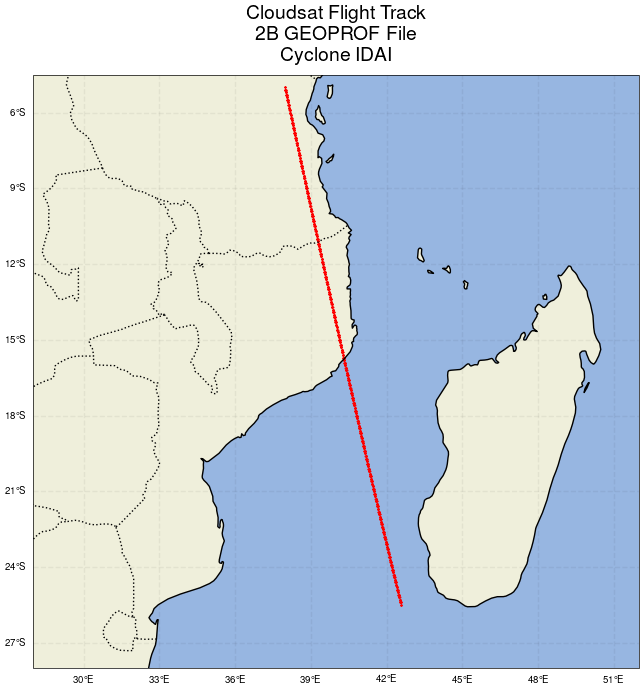

In [57]:

with plt.style.context(['science', 'nature']):
    fig = plt.figure(figsize=(8,7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ## set extent
    ax.set_extent([28, 52, -28, -4.5], crs=ccrs.PlateCarree())
    ## add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS,linestyle=":" )
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ### add flight path
    #plt.scatter(longitude, latitude, c=data, s=1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
    plt.scatter(ROI_lon, ROI_lat, c='red' , s=2, edgecolors=None, linewidth=0)
    ########### label axis
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", 
                      alpha=0.05, linestyle="--")
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylines = True
    gl.xlines = True
    ### add title
    plt.title('Cloudsat Flight Track  \n 2B GEOPROF File \n Cyclone IDAI', fontsize=14, y=1.01)
    ###
    plt.tight_layout()
    plt.show()

### Plot the Scientific DS

In [58]:
rev_Ref[20:100,:].shape # array size to plot

(80, 2117)

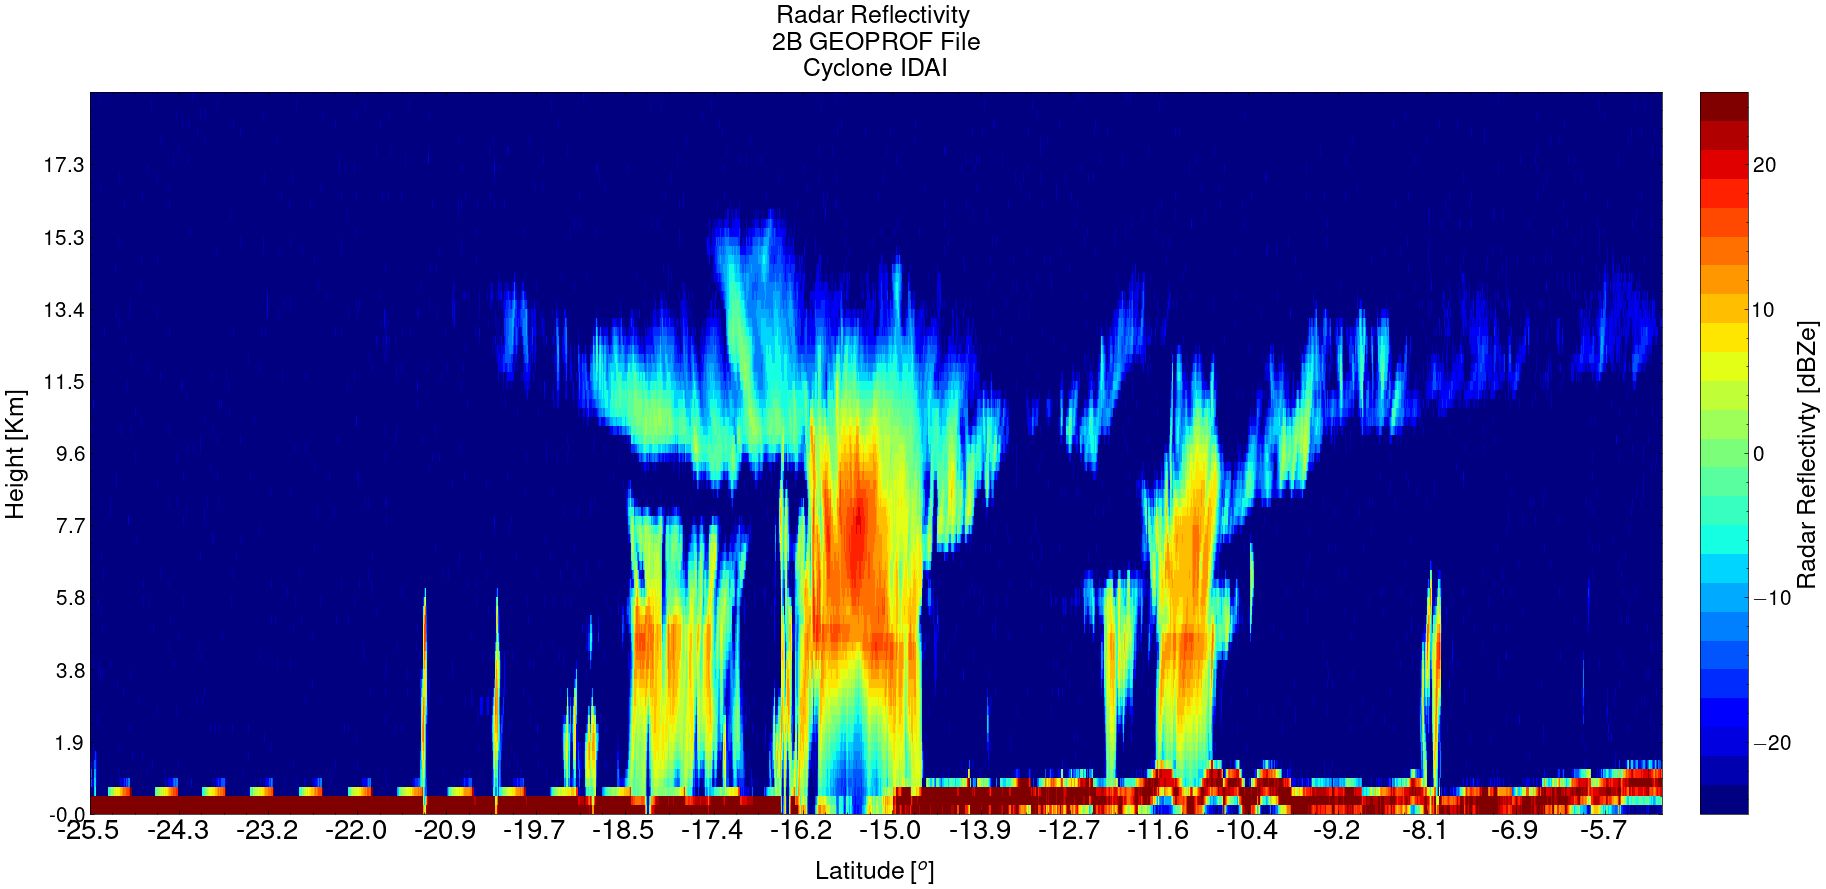

In [67]:
# plot radar reflectivity
with plt.style.context(['science', 'nature']):
    fig = plt.figure(figsize=(20,9)) 
    ## plot data
    plt.pcolormesh(rev_Ref[20:100,:],cmap=plt.get_cmap('jet',25), vmin=-25, vmax=25)
    ## add colorbar
    #plt.colorbar(aspect=15, pad=0.02).set_label(label='Radar Reflectivity [dBZe]',size=15, weight='bold')
    clb=plt.colorbar(aspect=15, pad=0.02)
    clb.ax.tick_params(labelsize=15) 
    clb.set_label('Radar Reflectivty [dBZe]', fontsize=18)
    # ticks
    plt.yticks(np.arange(0,80,step=8), np.round((ref_height[20:100:8,])/1000, 1))
    plt.xticks(np.arange(0,len(ROI_lat),step=120), (ROI_lat[0:len(ROI_lat):120,0]))
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=15)
    ## labels
    plt.ylabel('Height [Km]', color='k',fontsize=18, labelpad=12)
    plt.xlabel('Latitude [$^o$]',color='k',fontsize=18, labelpad=12)
    ## title
    plt.title('Radar Reflectivity \n 2B GEOPROF File \n Cyclone IDAI',fontsize=18, y=1.01)
    ##
    plt.tight_layout()
    plt.show()

... cloud mask

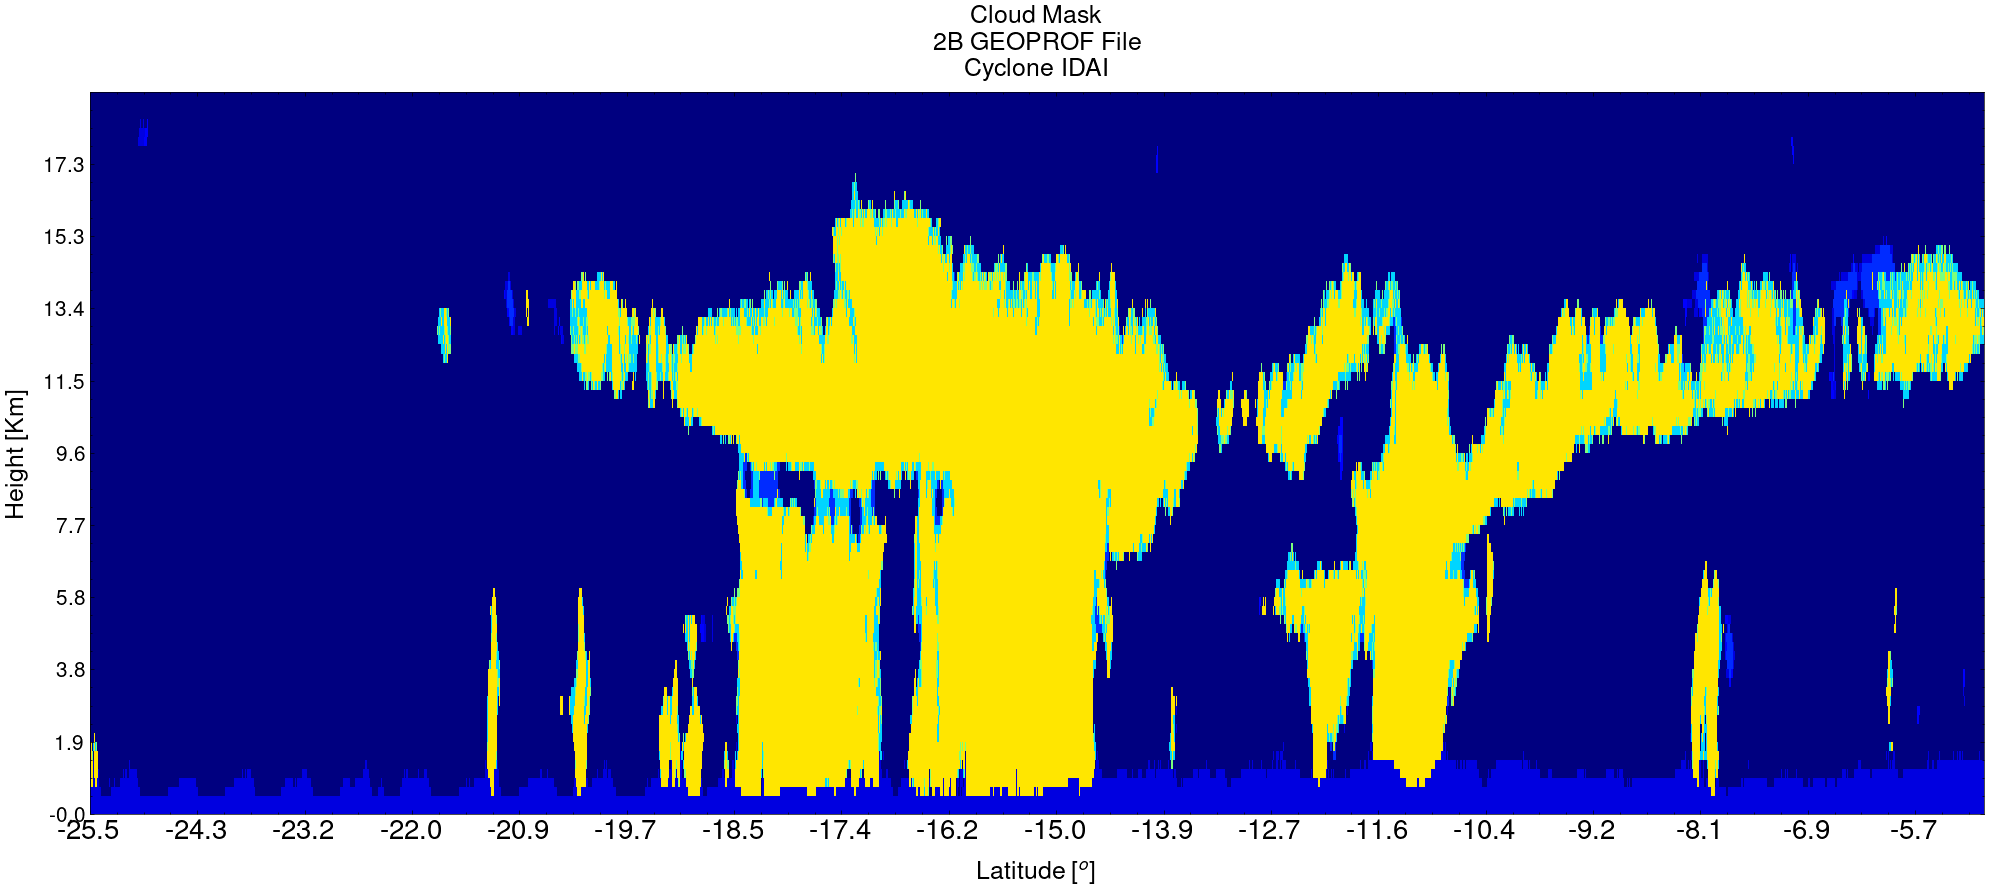

In [64]:
# plot cloud mask
with plt.style.context(['science', 'nature']):
    fig = plt.figure(figsize=(20,9)) 
    ## plot the data
    plt.pcolormesh(rev_c_mask[20:100,:],cmap=plt.get_cmap('jet',25), vmin=0, vmax=60)
    # ticks
    plt.yticks(np.arange(0,80,step=8), np.round((ref_height[20:100:8,])/1000, 1))
    plt.xticks(np.arange(0,len(ROI_lat),step=120), (ROI_lat[0:len(ROI_lat):120,0]))
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=15)
    ## labels
    plt.ylabel('Height [Km]',color='k',fontsize=18, labelpad=12)
    plt.xlabel('Latitude [$^o$]',color='k',fontsize=18, labelpad=12)
    ## title
    plt.title('Cloud Mask \n 2B GEOPROF File \n Cyclone IDAI',fontsize=18, y=1.01)
    ##
    plt.tight_layout()
    plt.show()

..combined radar reflectivity and cloud mask

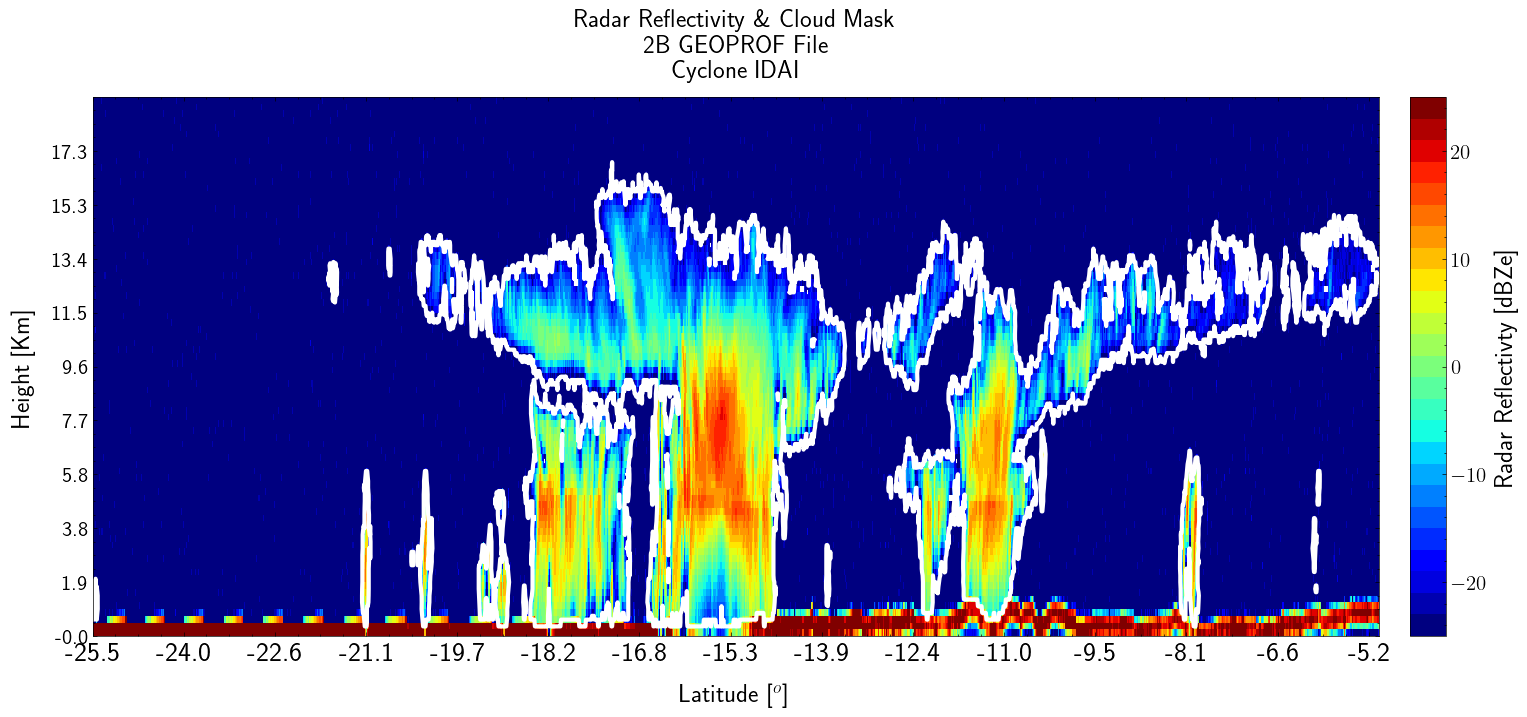

In [66]:
# plor cloud mask and radar reflectivity
with plt.style.context(['science', 'nature']):
    fig = plt.figure(figsize=(20,7)) 
    ## plot radar reflectivity data
    plt.pcolormesh(rev_Ref[20:100,:],cmap=plt.get_cmap('jet',25), vmin=-25, vmax=25)
    ## add colorbar
    #plt.colorbar(aspect=15, pad=0.02).set_label(label='Radar Reflectivty [dBZe]',size=15, weight='bold')
    clb=plt.colorbar(aspect=15, pad=0.02)
    clb.ax.tick_params(labelsize=15) 
    clb.set_label('Radar Reflectivty [dBZe]', fontsize=18)
    ## plot cloud mask contours
    levels = np.arange(20,60,20)
    plt.contour(rev_c_mask[20:100,:],levels,linewidths=3,colors='w')
    # ticks
    plt.yticks(np.arange(0,80,step=8), np.round((ref_height[20:100:8,])/1000, 1))
    plt.xticks(np.arange(0,len(ROI_lat),step=150), (ROI_lat[0:len(ROI_lat):150,0]))
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=15)
    ## labels
    plt.ylabel('Height [Km]',color='k',fontsize=18, labelpad=12)
    plt.xlabel('Latitude [$^o$]',color='k',fontsize=18, labelpad=12)
    ## add title
    plt.title('Radar Reflectivity \& Cloud Mask  \n 2B GEOPROF File \n Cyclone IDAI',
              fontsize=18,
              y=1.02)

Gas attenuation

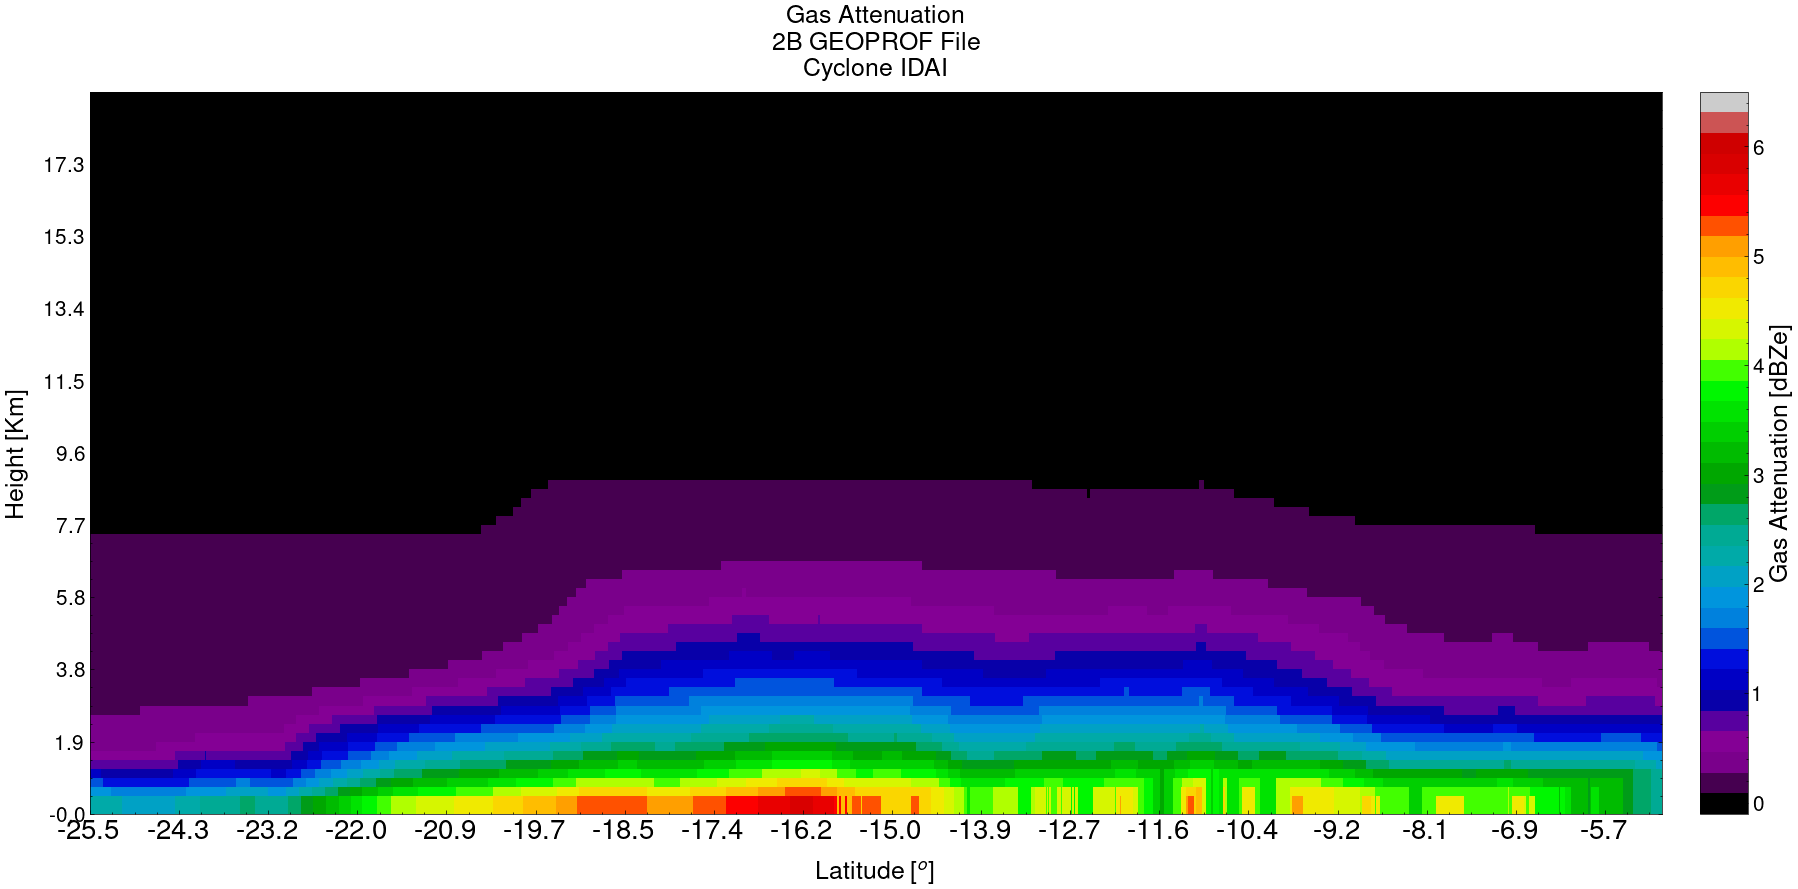

In [65]:
# plot gas attenuation
with plt.style.context(['science', 'nature']):
    fig = plt.figure(figsize=(20,9)) 
    ## plot data
    plt.pcolormesh(rev_Gas[20:100,:],cmap=plt.get_cmap('nipy_spectral',35), vmin=-0.1, vmax=6.5)
    ## add colorbar
    #plt.colorbar(aspect=15, pad=0.02).set_label(label='Gas Attenuation [dBZe]',size=18, weight='bold')
    clb=plt.colorbar(aspect=15, pad=0.02)
    clb.ax.tick_params(labelsize=15) 
    clb.set_label('Gas Attenuation [dBZe]', fontsize=18)
    # ticks
    plt.yticks(np.arange(0,80,step=8), np.round((ref_height[20:100:8,])/1000, 1))
    plt.xticks(np.arange(0,len(ROI_lat),step=120), (ROI_lat[0:len(ROI_lat):120,0]))
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=15)
    ## labels
    plt.ylabel('Height [Km]',color='k',fontsize=18, labelpad=12)
    plt.xlabel('Latitude [$^o$]',color='k',fontsize=18, labelpad=12)
    ## title
    plt.title('Gas Attenuation \n 2B GEOPROF File \n Cyclone IDAI',fontsize=18, y=1.01)
    ##
    plt.tight_layout()
    plt.show()

## masking out missing data

In [68]:
# missing data is -8888 for radar reflectivivity
rev_Ref_miss = np.where(rev_Ref == -8888/100, np.nan, rev_Ref) # /100 because I had already scaled the data

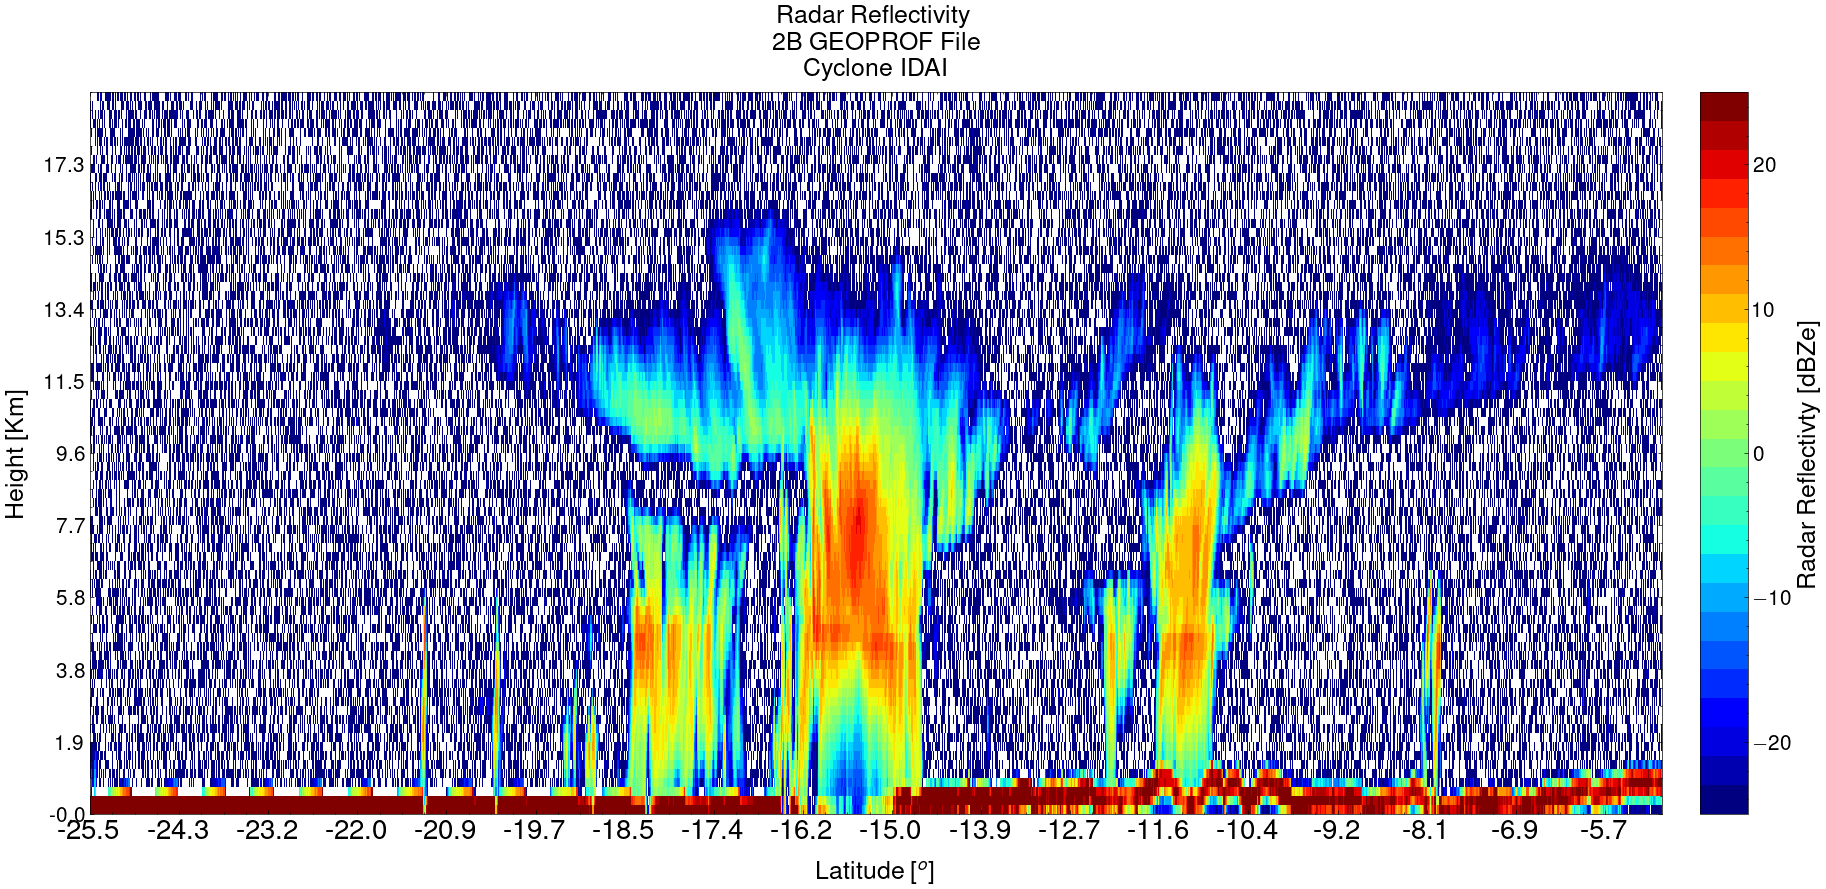

In [69]:
# plot radar reflectivity, masking out missing data
with plt.style.context(['science', 'nature']):
    fig = plt.figure(figsize=(20,9)) 
    ## plot data
    plt.pcolormesh(rev_Ref_miss[20:100,:],cmap=plt.get_cmap('jet',25), vmin=-25, vmax=25)
    ## add colorbar
    #plt.colorbar(aspect=15, pad=0.02).set_label(label='Radar Reflectivity [dBZe]',size=15, weight='bold')
    clb=plt.colorbar(aspect=15, pad=0.02)
    clb.ax.tick_params(labelsize=15) 
    clb.set_label('Radar Reflectivty [dBZe]', fontsize=18)
    # ticks
    plt.yticks(np.arange(0,80,step=8), np.round((ref_height[20:100:8,])/1000, 1))
    plt.xticks(np.arange(0,len(ROI_lat),step=120), (ROI_lat[0:len(ROI_lat):120,0]))
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=15)
    ## labels
    plt.ylabel('Height [Km]', color='k',fontsize=18, labelpad=12)
    plt.xlabel('Latitude [$^o$]',color='k',fontsize=18, labelpad=12)
    ## title
    plt.title('Radar Reflectivity \n 2B GEOPROF File \n Cyclone IDAI',fontsize=18, y=1.01)
    ##
    plt.tight_layout()
    plt.show()